In [1]:
import pandas as pd
path = "D:/TON IOT/Processed_datasets/Processed_datasets/Processed_IoT_dataset/IoT_Weather.csv"
weatherData = pd.read_csv(path)
print(weatherData.shape)
weatherData.head()

(650242, 7)


,date,time,temperature,pressure,humidity,label,type
0,31-Mar-19,12:36:52,31.788508,1.035,32.036579,0,normal
1,31-Mar-19,12:36:53,41.630997,1.035,30.886165,0,normal
2,31-Mar-19,12:36:54,42.256959,1.035,19.755908,0,normal
3,31-Mar-19,12:36:55,49.116581,1.035,78.949621,0,normal
4,31-Mar-19,12:36:56,24.017085,1.035,40.001059,0,normal


In [2]:
weatherData.drop('type', axis = 1, inplace=True)
weatherData.drop(weatherData.iloc[:, 0:2], axis = 1, inplace=True)
weatherData.head()

,temperature,pressure,humidity,label
0,31.788508,1.035,32.036579,0
1,41.630997,1.035,30.886165,0
2,42.256959,1.035,19.755908,0
3,49.116581,1.035,78.949621,0
4,24.017085,1.035,40.001059,0


col:  temperature


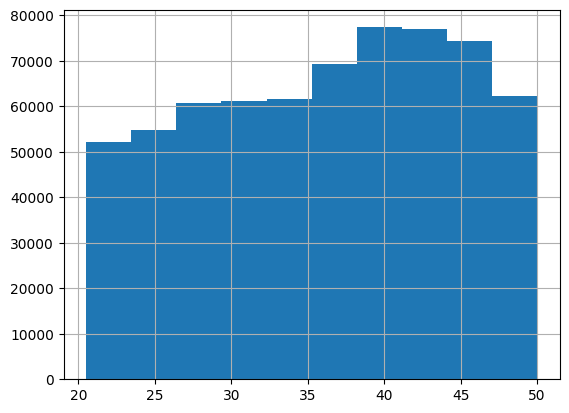

col:  pressure


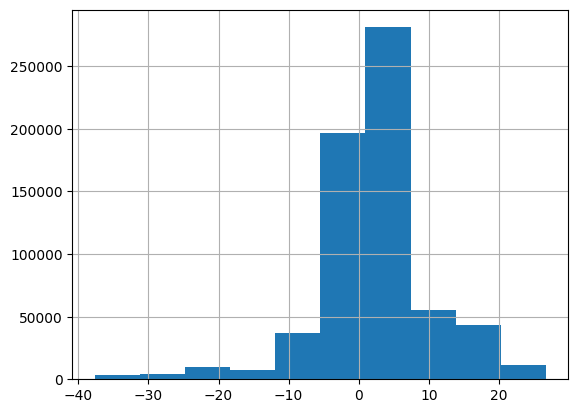

col:  humidity


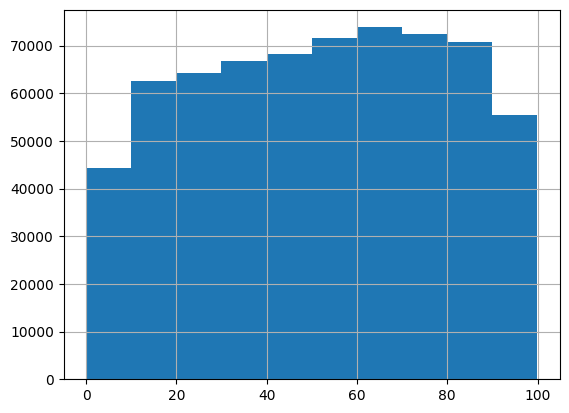

col:  label


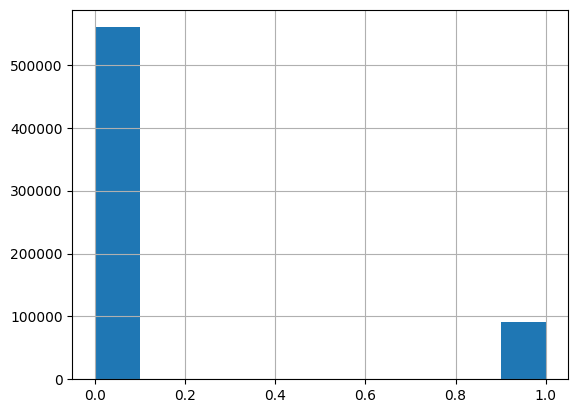

In [3]:
import matplotlib.pyplot as plt
columns = weatherData.columns
for col in columns:
    print("col: ", col)
    weatherData[col].hist()
    plt.show()

<AxesSubplot: >

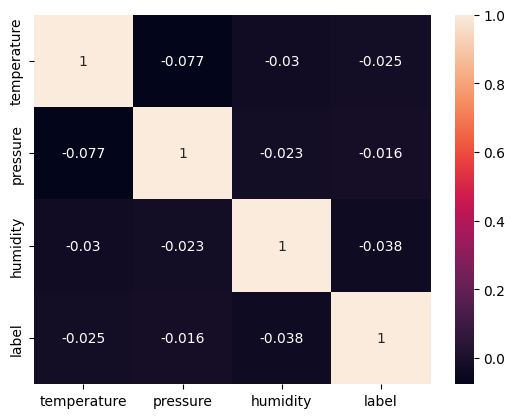

In [4]:
import seaborn as sns
corr = weatherData.corr()
corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr,annot=True)

In [5]:
x = weatherData.drop('label', axis = 1)
y = weatherData['label']
print(y.value_counts())

0    559718
1     90524
Name: label, dtype: int64


In [6]:
y.dtypes

dtype('int64')

In [7]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [10]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
def get_accuracy_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelAccuracyTest = accuracy_score(y_pred,y_test)
    return modelAccuracyTest

def get_f1_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelF1Test = f1_score(y_pred,y_test)
    return modelF1Test

def get_auc_roc(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelAucRocTest = roc_auc_score(y_pred,y_test)
    return modelAucRocTest

# Without Oversampling

In [11]:
from sklearn.tree import DecisionTreeClassifier
from statistics import mean
Dtree_accuracy_scores = []
Dtree_f1_scores = []
Dtree_auc_roc_scores = []

for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    Dtree_auc_roc_scores.append(get_auc_roc(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

mean_Dtree_accuracy_score = round(mean(Dtree_accuracy_scores)*100, 2)
mean_Dtree_f1_score = round(mean(Dtree_f1_scores)*100, 2)
mean_Dtree_auc_roc_score = round(mean(Dtree_auc_roc_scores)*100, 2)

print('Dtree Accuracy Score:',mean_Dtree_accuracy_score)
print('Dtree F1 Score:', mean_Dtree_f1_score)
print('Dtree AUC ROC Score:', mean_Dtree_auc_roc_score)

Dtree Accuracy Score: 97.0
Dtree F1 Score: 89.12
Dtree AUC ROC Score: 94.03


In [12]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0: 489754, 1: 79208}
After oversampling {0: 489754, 1: 489754}


In [13]:
from sklearn.tree import DecisionTreeClassifier
from statistics import mean
ovr_Dtree_accuracy_scores = []
ovr_Dtree_f1_scores = []
ovr_Dtree_auc_roc_scores = []

for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]
    ovr_Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    ovr_Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    ovr_Dtree_auc_roc_scores.append(get_auc_roc(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

mean_ovr_Dtree_accuracy_score = round(mean(ovr_Dtree_accuracy_scores)*100, 2)
mean_ovr_Dtree_f1_score = round(mean(ovr_Dtree_f1_scores)*100, 2)
mean_ovr_Dtree_auc_roc_score = round(mean(ovr_Dtree_auc_roc_scores)*100, 2)

print('Dtree Accuracy Score after Oversampling:',mean_ovr_Dtree_accuracy_score)
print('Dtree F1 Score after Oversampling:', mean_ovr_Dtree_f1_score)
print('Dtree AUC ROC Score Oversampling:', mean_ovr_Dtree_auc_roc_score)

Dtree Accuracy Score after Oversampling: 96.4
Dtree F1 Score after Oversampling: 96.38
Dtree AUC ROC Score Oversampling: 96.39


# ^Much better overall score when oversampled

In [21]:
# Dummy code to test different amount of folds

# Dtree_accuracy_scores = []
# Dtree_f1_scores = []

# for train_index, test_index in skf.split(x, y):
#     x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

#     Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
#     Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

# print('Accuracy Score: ',mean(Dtree_accuracy_scores))
# print('F1 Score:', mean(Dtree_f1_scores))

<AxesSubplot: xlabel='label', ylabel='count'>

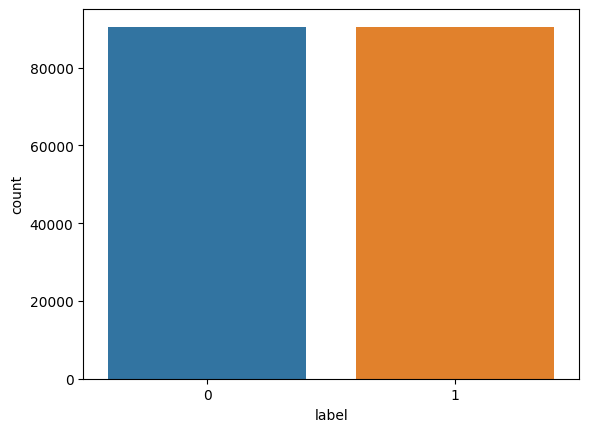

In [14]:
# saving the name of the target variable
target = 'label'

import numpy as np
minority_class_len = len(weatherData[weatherData[target] == 1])
majority_class_indices = weatherData[weatherData[target] == 0].index

random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)

minority_class_indices = weatherData[weatherData[target] == 1].index

under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])

under_sample = weatherData.loc[under_sample_indices]

import seaborn as sns
sns.countplot(x = target, data = under_sample)


In [15]:
und_x = under_sample.loc[:, weatherData.columns !=target]
und_y = under_sample.loc[:, weatherData.columns == target]

from sklearn.tree import DecisionTreeClassifier
from statistics import mean
und_Dtree_accuracy_scores = []
und_Dtree_f1_scores = []
und_Dtree_auc_roc_scores = []

for train_index, test_index in skf.split(und_x, und_y):
    x_train, x_test, y_train, y_test = und_x.iloc[train_index], und_x.iloc[test_index], und_y.iloc[train_index], und_y.iloc[test_index]
    und_Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    und_Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    und_Dtree_auc_roc_scores.append(get_auc_roc(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

mean_und_Dtree_accuracy_score = round(mean(und_Dtree_accuracy_scores)*100, 2)
mean_und_Dtree_f1_score = round(mean(und_Dtree_f1_scores)*100, 2)
mean_und_Dtree_auc_roc_score = round(mean(und_Dtree_auc_roc_scores)*100, 2)

print('Dtree UnderSampled Accuracy Score:',mean_und_Dtree_accuracy_score)
print('Dtree UnderSampled F1 Score:', mean_und_Dtree_f1_score)
print('Dtree UnderSampled AUC ROC Score:', mean_und_Dtree_auc_roc_score)

Dtree UnderSampled Accuracy Score: 91.18
Dtree UnderSampled F1 Score: 91.28
Dtree UnderSampled AUC ROC Score: 91.2


# ^Better Results than without any sampling

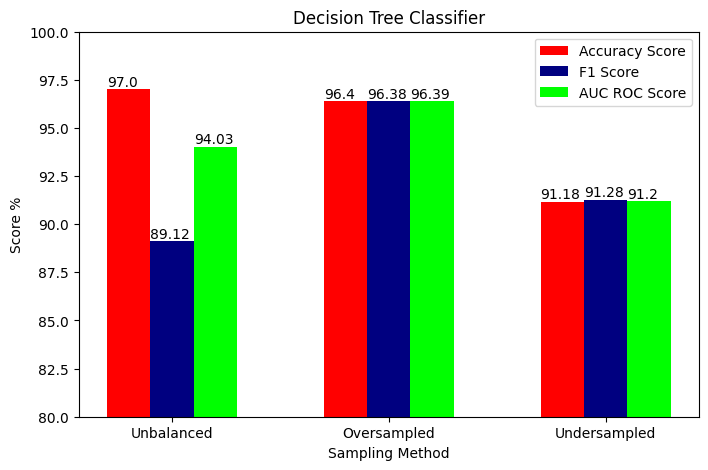

In [16]:
#Plotting a bar graph to compare the accuracy scores of the different scoring metrics
all_accuracy_scores = [mean_Dtree_accuracy_score, mean_ovr_Dtree_accuracy_score, mean_und_Dtree_accuracy_score]
all_f1_scores = [mean_Dtree_f1_score, mean_ovr_Dtree_f1_score, mean_und_Dtree_f1_score]
all_auc_roc_scores = [mean_Dtree_auc_roc_score, mean_ovr_Dtree_auc_roc_score, mean_und_Dtree_auc_roc_score]
x_labels = ['Unbalanced', 'Oversampled', 'Undersampled']

def autolabel(rectangle_group):
    for rect in rectangle_group:
        height = rect.get_height()

        ax.annotate(str(height), xy = (rect.get_x(), height+.15))

width = 0.2

x_all_accuracy_score = [x-width for x in range (len(all_accuracy_scores))]
x_all_f1_score = [x for x in range (len(all_f1_scores))]
x_all_auc_roc_score = [x+width for x in range (len(all_auc_roc_scores))]

fig,ax = plt.subplots(figsize = (8, 5))
rect1 = ax.bar(x_all_accuracy_score ,all_accuracy_scores, width, label='Accuracy Score', color = 'red')
rect2 = ax.bar(x_all_f1_score, all_f1_scores, width, label='F1 Score', color='navy')
rect3 = ax.bar(x_all_auc_roc_score, all_auc_roc_scores, width, label='AUC ROC Score', color='lime')
plt.xticks([x for x in range(len(x_labels))], x_labels)
ax.set_title('Decision Tree Classifier')
ax.set_xlabel('Sampling Method')
ax.set_ylabel('Score %')
plt.ylim([80, 100])
ax.legend()

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
plt.show()